<div class='alert alert-info'>
    <h2>Agrupación categórica</h2>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
gender = ['Male', 'Female']
income = ['Poor', 'Middel', 'Rich']

In [3]:
n = 500 # size dataframe

gender_data = []
income_data = []

for i in range(n):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))
    


In [4]:
# n = media + desviación * distribución
height = (160 + 30*np.random.randn(n)).astype(int)
weight = (65 + 25*np.random.randn(n)).astype(int)
age = (30 + 12*np.random.randn(n)).astype(int)
income = 18000 + 3500*np.random.randn(n)

In [5]:
data = pd.DataFrame(
    {
        'Gender': gender_data,
        'Economic Status': income_data,
        'Height': height,
        'Weight': weight,
        'Age': age,
        'Income': income
    }
)

data.head()

,Gender,Economic Status,Height,Weight,Age,Income
0,Male,Poor,157,67,41,16529.987799
1,Female,Rich,161,76,14,19652.077954
2,Male,Poor,193,59,33,24803.684632
3,Female,Poor,133,51,18,23794.067728
4,Male,Rich,180,76,14,21566.352617


In [6]:
gruped_gender = data.groupby('Gender')

gruped_gender.groups

{'Female': Int64Index([  1,   3,   5,   6,   7,   9,  14,  16,  18,  19,
             ...
             483, 484, 486, 488, 491, 492, 494, 495, 498, 499],
            dtype='int64', length=259),
 'Male': Int64Index([  0,   2,   4,   8,  10,  11,  12,  13,  15,  17,
             ...
             477, 478, 480, 485, 487, 489, 490, 493, 496, 497],
            dtype='int64', length=241)}

In [7]:
for names, groups in gruped_gender:
    print(names)
    print(groups)

Female
     Gender Economic Status  Height  Weight  Age        Income
1    Female            Rich     161      76   14  19652.077954
3    Female            Poor     133      51   18  23794.067728
5    Female          Middel     168      53   15  14337.866024
6    Female            Poor     156     102   40  19524.158993
7    Female            Poor     189      97   33  17061.403390
9    Female            Poor     146      31   35  18843.624059
14   Female            Rich     160      97   37  14829.789998
16   Female            Poor     178      14   32  16449.889914
18   Female            Rich     188      28   12  19833.516796
19   Female            Rich     150      16   27  13115.883827
20   Female            Rich     148      63   33  19220.348881
23   Female            Poor     122      50   16  16575.750778
24   Female          Middel     111      74   12  22148.227313
25   Female            Poor     134      77   59  12786.593813
26   Female          Middel     171      73   10

In [8]:
gruped_gender.get_group('Female').head()

,Gender,Economic Status,Height,Weight,Age,Income
1,Female,Rich,161,76,14,19652.077954
3,Female,Poor,133,51,18,23794.067728
5,Female,Middel,168,53,15,14337.866024
6,Female,Poor,156,102,40,19524.158993
7,Female,Poor,189,97,33,17061.403390


## Doble agrupación

In [9]:
double = data.groupby(['Gender', 'Economic Status'])
for names, groups in double:
    print(names)

('Female', 'Middel')
('Female', 'Poor')
('Female', 'Rich')
('Male', 'Middel')
('Male', 'Poor')
('Male', 'Rich')


<div class='alert alert-success'>
    <h3>Operaciones sobre datos agrupados.</h3>
</div>

In [10]:
double.sum()

Height  Weight   Age        Income
Gender Economic Status                                    
Female Middel            15254    6191  2922  1.773954e+06
       Poor              12398    4906  2363  1.385072e+06
       Rich              13808    5831  2581  1.580937e+06
Male   Middel            13578    5390  2536  1.473889e+06
       Poor               9854    3842  1851  1.114144e+06
       Rich              14814    6087  2743  1.678623e+06

In [11]:
double.mean()

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middel           158.895833  64.489583  30.437500  18478.685639
       Poor             163.131579  64.552632  31.092105  18224.629535
       Rich             158.712644  67.022989  29.666667  18171.684744
Male   Middel           159.741176  63.411765  29.835294  17339.872082
       Poor             158.935484  61.967742  29.854839  17970.057066
       Rich             157.595745  64.755319  29.180851  17857.688691

In [12]:
double.size()

Gender  Economic Status
Female  Middel             96
        Poor               76
        Rich               87
Male    Middel             85
        Poor               62
        Rich               94
dtype: int64

In [13]:
double.describe()

Height                                               \
                        count        mean        std    min     25%    50%   
Gender Economic Status                                                       
Female Middel            96.0  158.895833  30.728858   76.0  141.75  159.5   
       Poor              76.0  163.131579  31.770570  101.0  136.50  162.5   
       Rich              87.0  158.712644  29.844523   86.0  138.50  161.0   
Male   Middel            85.0  159.741176  27.378803   88.0  139.00  161.0   
       Poor              62.0  158.935484  30.298986   89.0  134.50  159.5   
       Rich              94.0  157.595745  27.403916   97.0  140.00  159.0   

                                      Weight             ...    Age        \
                           75%    max  count       mean  ...    75%   max   
Gender Economic Status                                   ...                
Female Middel           177.75  229.0   96.0  64.489583  ...  36.50  56.0   
       Poor             186.00  236.0   76.0  64.552632  ...  40.00  59.0   
       Rich             181.00  233.0   87.0  67.022989  ...  38.00  50.0   
Male   Middel           181.00  215.0   85.0  63.411765  ...  37.00  58.0   
       Poor             185.75  224.0   62.0  61.967742  ...  36.75  57.0   
       Rich             172.75  230.0   94.0  64.755319  ...  39.00  55.0   

                       Income                                           \
                        count          mean          std           min   
Gender Economic Status                                                   
Female Middel            96.0  18478.685639  3283.155028  11225.967444   
       Poor              76.0  18224.629535  3331.097129   9596.774770   
       Rich              87.0  18171.684744  3127.990350  11230.813628   
Male   Middel            85.0  17339.872082  3174.409417  10146.667980   
       Poor              62.0  17970.057066  3324.351522  11572.637815   
       Rich              94.0  17857.688691  3742.464500   6372.035162   

                                                                                
                                 25%           50%           75%           max  
Gender Economic Status                                                          
Female Middel           16307.468489  18443.624613  20799.022963  25596.695874  
       Poor             16084.336260  18202.916995  20685.636654  25161.897885  
       Rich             15982.312208  18740.059565  20309.647238  26287.412575  
Male   Middel           15293.723206  16888.482032  19248.903589  25615.538140  
       Poor             15472.776744  18035.723871  20386.491498  24803.684632  
       Rich             15379.661870  17922.338376  20001.115471  29351.224494  

[6 rows x 32 columns]

In [14]:
gruped_income = double['Income']
gruped_income.describe()

count          mean          std           min  \
Gender Economic Status                                                   
Female Middel            96.0  18478.685639  3283.155028  11225.967444   
       Poor              76.0  18224.629535  3331.097129   9596.774770   
       Rich              87.0  18171.684744  3127.990350  11230.813628   
Male   Middel            85.0  17339.872082  3174.409417  10146.667980   
       Poor              62.0  17970.057066  3324.351522  11572.637815   
       Rich              94.0  17857.688691  3742.464500   6372.035162   

                                 25%           50%           75%           max  
Gender Economic Status                                                          
Female Middel           16307.468489  18443.624613  20799.022963  25596.695874  
       Poor             16084.336260  18202.916995  20685.636654  25161.897885  
       Rich             15982.312208  18740.059565  20309.647238  26287.412575  
Male   Middel           15293.723206  16888.482032  19248.903589  25615.538140  
       Poor             15472.776744  18035.723871  20386.491498  24803.684632  
       Rich             15379.661870  17922.338376  20001.115471  29351.224494

In [15]:
double.aggregate(
    {
        'Income': np.sum,
        'Age': np.mean,
        'Height': np.std
    }
)

Income        Age     Height
Gender Economic Status                                    
Female Middel           1.773954e+06  30.437500  30.728858
       Poor             1.385072e+06  31.092105  31.770570
       Rich             1.580937e+06  29.666667  29.844523
Male   Middel           1.473889e+06  29.835294  27.378803
       Poor             1.114144e+06  29.854839  30.298986
       Rich             1.678623e+06  29.180851  27.403916

In [16]:
double.aggregate(
    {
        'Age': np.mean,
        'Height': lambda h: np.mean(h) / np.std(h)
    }
)

Age    Height
Gender Economic Status                     
Female Middel           30.437500  5.198043
       Poor             31.092105  5.168794
       Rich             29.666667  5.348811
Male   Middel           29.835294  5.869110
       Poor             29.854839  5.288393
       Rich             29.180851  5.781683

In [17]:
double.aggregate([np.sum, np.mean])

Height             Weight              Age             \
                          sum        mean    sum       mean   sum       mean   
Gender Economic Status                                                         
Female Middel           15254  158.895833   6191  64.489583  2922  30.437500   
       Poor             12398  163.131579   4906  64.552632  2363  31.092105   
       Rich             13808  158.712644   5831  67.022989  2581  29.666667   
Male   Middel           13578  159.741176   5390  63.411765  2536  29.835294   
       Poor              9854  158.935484   3842  61.967742  1851  29.854839   
       Rich             14814  157.595745   6087  64.755319  2743  29.180851   

                              Income                
                                 sum          mean  
Gender Economic Status                              
Female Middel           1.773954e+06  18478.685639  
       Poor             1.385072e+06  18224.629535  
       Rich             1.580937e+06  18171.684744  
Male   Middel           1.473889e+06  17339.872082  
       Poor             1.114144e+06  17970.057066  
       Rich             1.678623e+06  17857.688691

<div class='alert alert-success'>
    <h3>Filtrado de Datos.</h3>
</div>

In [18]:

double['Age'].filter(lambda x: x.sum() > 2400);

In [19]:
# Transformación
zscore = lambda h: np.mean(h) / np.std(h)
double.transform(zscore).head()

,Height,Weight,Age,Income
0,5.288393,2.022902,2.414933,5.449711
1,5.348811,2.840824,2.836719,5.843058
2,5.288393,2.022902,2.414933,5.449711
3,5.168794,2.234662,2.475787,5.507412
4,5.781683,2.784011,2.343064,4.797224


<div class='alert alert-success'>
    <h3>Conjunto de entrenamiento y testing.</h3>
</div>

In [20]:
data = pd.read_csv('../datasets/customer-churn-model/Customer Churn Model.txt')
len(data)

3333

## Dividir con distribución normal

In [21]:
a = np.random.randn(3333)
check = (a<0.8)
check

array([False,  True, False, ...,  True,  True, False])

(array([ 692.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2641.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

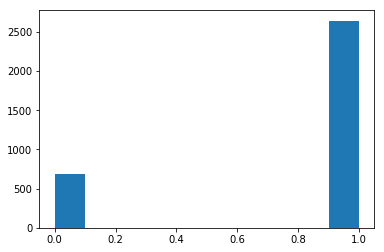

In [22]:
plt.hist(check.astype(int))

Vemos que aproximadamente el 80% esta en True y el resto en False

In [23]:
training = data[check]
testing = data[~check]

In [24]:
print(len(training))
print(len(testing))
print(len(testing)/3333)

2641
692
0.2076207620762076


## Usando sklearn

In [25]:
# Validación cruzada

train, test = train_test_split(data, test_size = 0.2)

In [26]:
len(train)

2666

## Usando función shuffle

In [27]:
from sklearn.utils import shuffle
data = shuffle(data);

In [28]:
train_data = data[:int(0.75*len(data))]
test_data = data[int(0.75*len(data))+1:]

<div class='alert alert-success'>
    <h3>Concatenar dataSets</h3>
</div>

In [29]:
red_wine = pd.read_csv('../datasets/wine/winequality-red.csv', sep=';')
white_wine = pd.read_csv('../datasets/wine/winequality-white.csv', sep=';')

In [30]:
 print('Wine red', red_wine.shape)
 print('Wine white', white_wine.shape)

Wine red (1599, 12)
Wine white (4898, 12)


In [39]:
# Concatenamos por filas para que quede uno debajo del otro ( APILAMIENTO )
wine_data = pd.concat([red_wine, white_wine], axis=0)
print(wine_data.shape)
wine_data[1598: 1601]

(6497, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1598,6.0,0.31,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6


In [32]:
data1 = wine_data.head(10)
data2 = wine_data[300: 310]
data3 = wine_data.tail(10)

wine_scramble = pd.concat([data1, data2, data3])
wine_scramble.shape

(30, 12)